<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 2. Визуальный анализ данных
## <center>Практическое задание. Визуальный анализ данных по пассажирам "Титаника". Решение

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Считываем обучающую выборку.**

In [4]:
train_df = pd.read_csv("../../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [5]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Stanley, Mr. Edward Roland",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 10 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null int64
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Ticket      712 non-null object
Fare        712 non-null float64
Embarked    712 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 81.2+ KB


**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [16]:
train_df = train_df.drop('Cabin', axis=1).dropna()

KeyError: "['Cabin'] not found in axis"

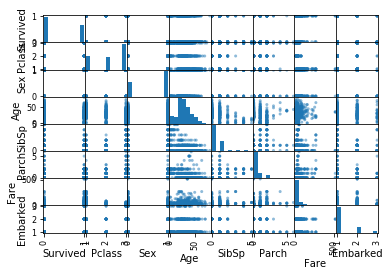

In [17]:
pd.plotting.scatter_matrix(train_df);

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

In [18]:
train_df['Embarked'] = train_df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

In [19]:
train_df['Sex'] = train_df['Sex'].map({"male": 1, "female": 0}) 

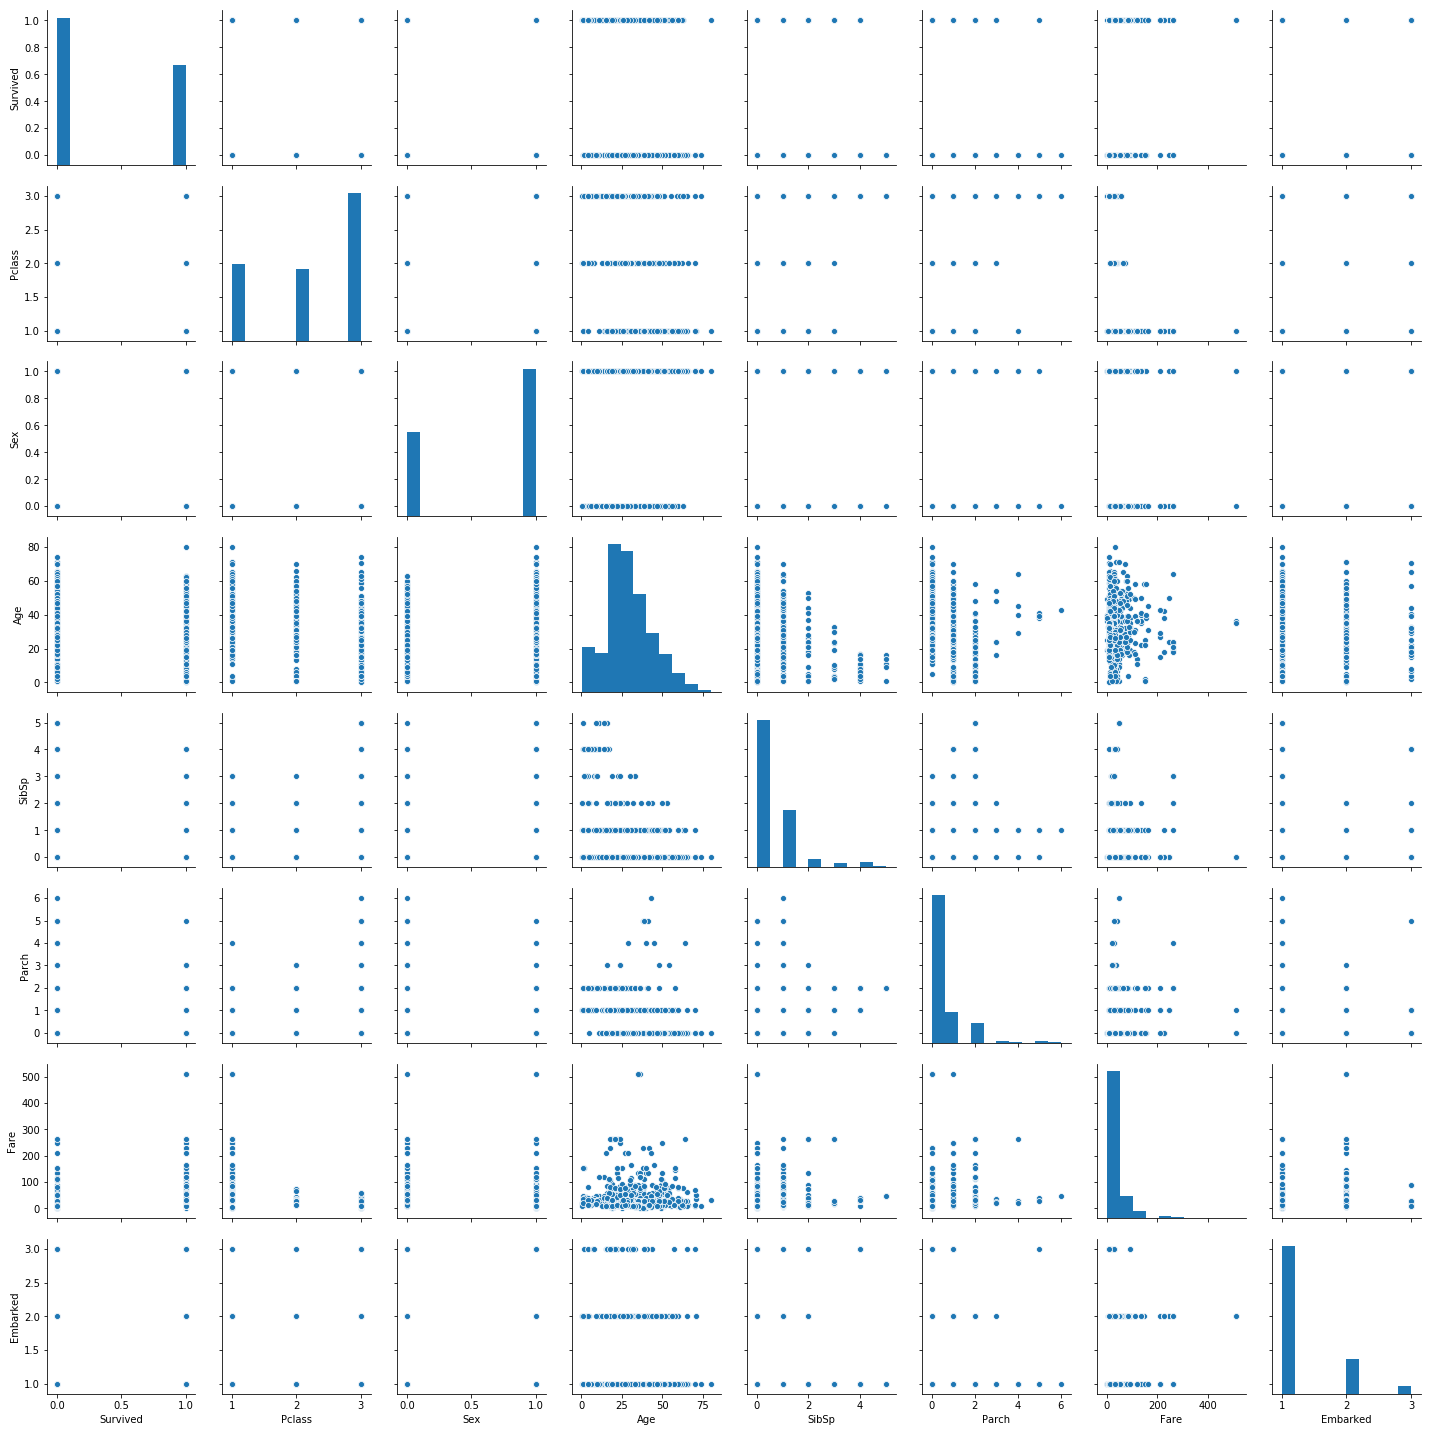

In [12]:
sns.pairplot(train_df);

ValueError: max must be larger than min in range parameter.

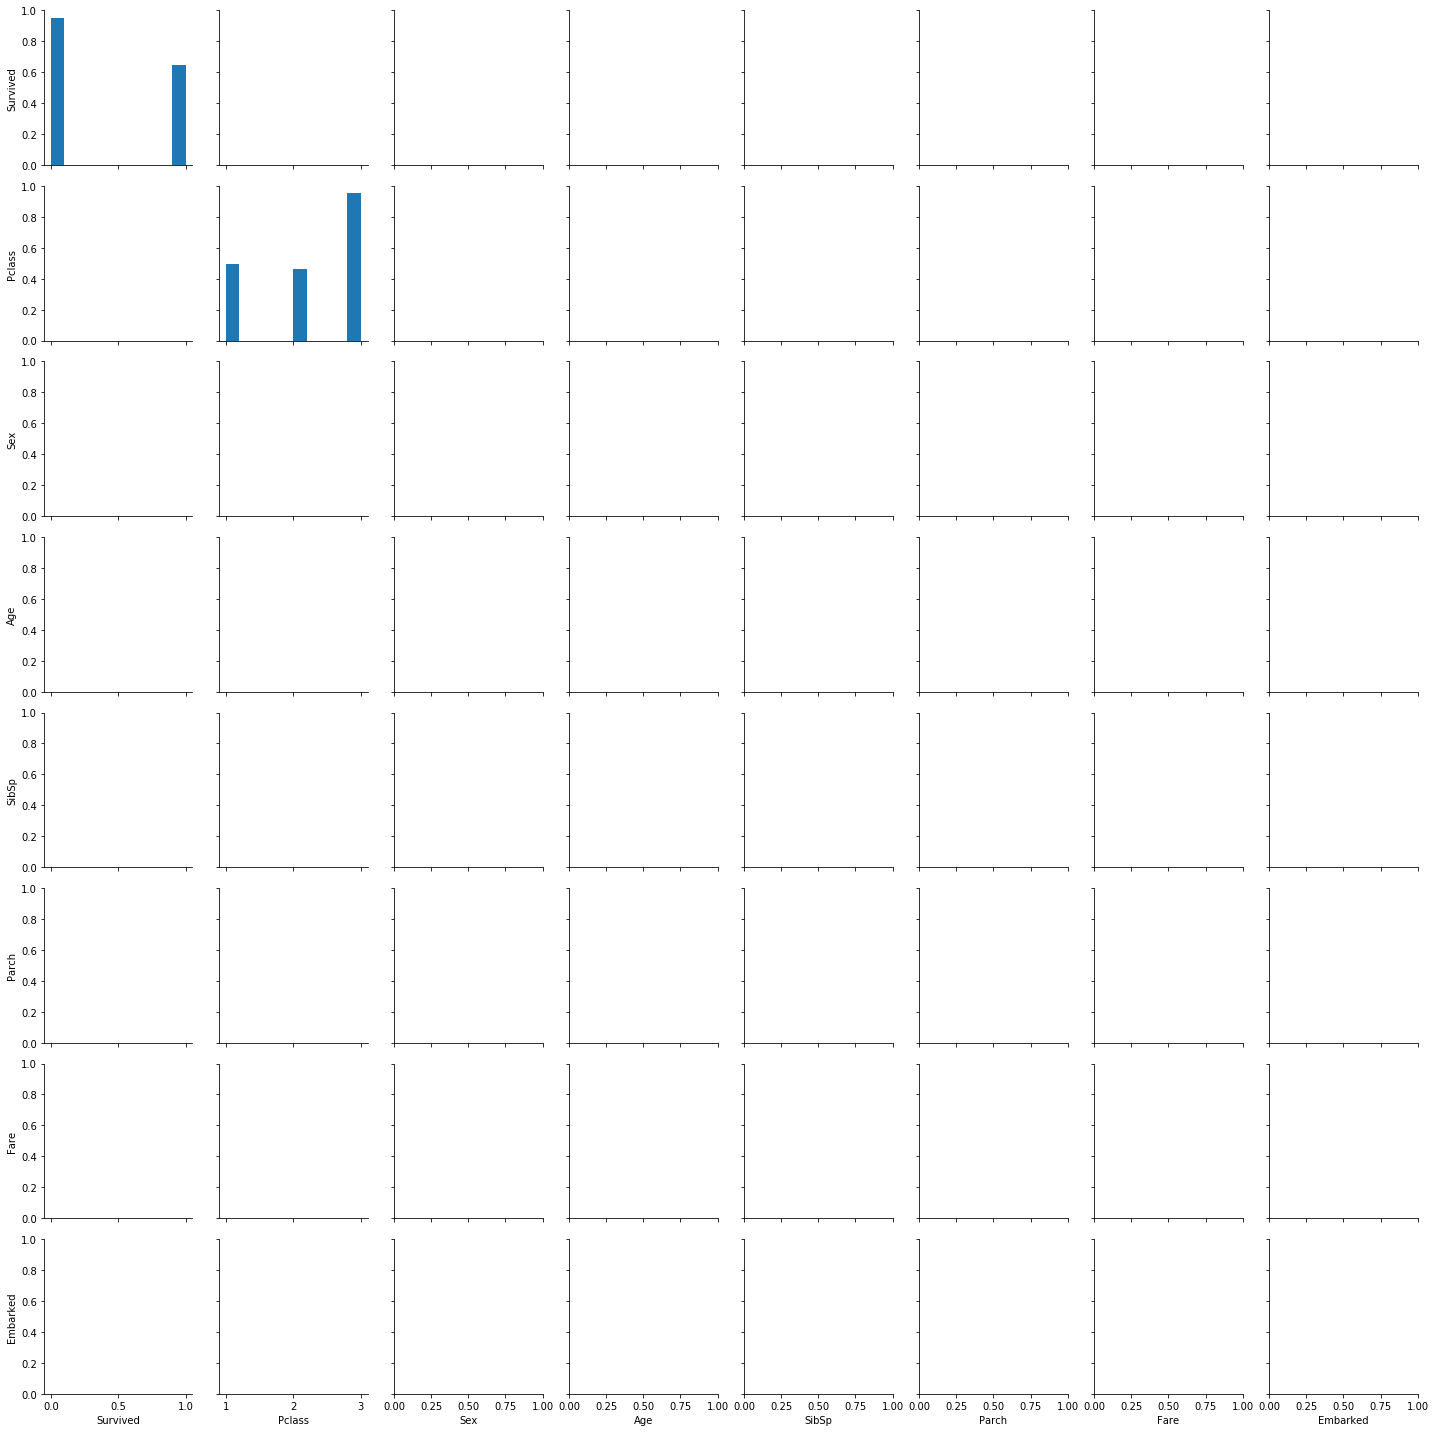

In [22]:
sns.pairplot(train_df);

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

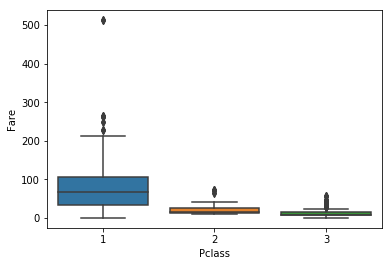

In [21]:
sns.boxplot(x='Pclass', y='Fare', data=train_df);

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

In [23]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']

In [30]:
fare_pclass1[fare_pclass1 < (fare_pclass1.mean() + 2*fare_pclass1.std())]

PassengerId
2       71.2833
4       53.1000
7       51.8625
12      26.5500
24      35.5000
31      27.7208
35      82.1708
36      52.0000
53      76.7292
55      61.9792
63      83.4750
84      47.1000
93      61.1750
97      34.6542
98      63.3583
103     77.2875
111     52.0000
119    247.5208
125     77.2875
137     26.2833
138     53.1000
140     79.2000
152     66.6000
156     61.3792
171     33.5000
175     30.6958
178     28.7125
188     26.5500
195     27.7208
196    146.5208
         ...   
725     53.1000
731    211.3375
742     78.8500
746     71.0000
749     53.1000
760     86.5000
764    120.0000
766     77.9583
780    211.3375
782     57.0000
783     30.0000
790     79.2000
797     25.9292
803    120.0000
807      0.0000
810     53.1000
821     93.5000
823      0.0000
836     83.1583
843     31.0000
854     39.4000
857    164.8667
858     26.5500
863     25.9292
868     50.4958
872     52.5542
873      5.0000
880     83.1583
888     30.0000
890     30.0000
Name: Fare, 

In [31]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1[fare_pclass1 < (fare_pclass1.mean() + 2*fare_pclass1.std())]
fare_pclass2_no_out = fare_pclass2[fare_pclass2 < (fare_pclass2.mean() + 2*fare_pclass2.std())]
fare_pclass3_no_out = fare_pclass3[fare_pclass3 < (fare_pclass3.mean() + 2*fare_pclass3.std())]
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                             .append(fare_pclass3_no_out)

In [48]:
train_df['Fare_no_out']

PassengerId
1        7.2500
2       71.2833
3        7.9250
4       53.1000
5        8.0500
7       51.8625
8       21.0750
9       11.1333
10      30.0708
11      16.7000
12      26.5500
13       8.0500
14      31.2750
15       7.8542
16      16.0000
17      29.1250
19      18.0000
21      26.0000
22      13.0000
23       8.0292
24      35.5000
25      21.0750
26      31.3875
28          NaN
31      27.7208
34      10.5000
35      82.1708
36      52.0000
38       8.0500
39      18.0000
         ...   
857    164.8667
858     26.5500
859     19.2583
861     14.1083
862     11.5000
863     25.9292
865     13.0000
866     13.0000
867     13.8583
868     50.4958
870     11.1333
871      7.8958
872     52.5542
873      5.0000
874      9.0000
875     24.0000
876      7.2250
877      9.8458
878      7.8958
880     83.1583
881     26.0000
882      7.8958
883     10.5167
884     10.5000
885      7.0500
886     29.1250
887     13.0000
888     30.0000
890     30.0000
891      7.7500
Name: Fare_n

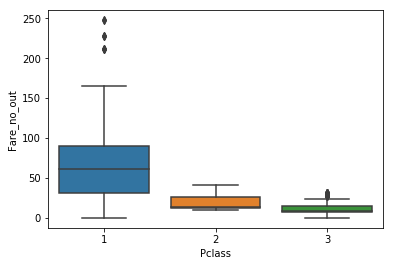

In [33]:
sns.boxplot(x='Pclass', y='Fare_no_out', data=train_df)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

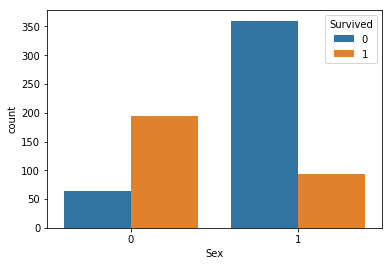

In [38]:
sns.countplot(hue='Survived', x='Sex', data=train_df);

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

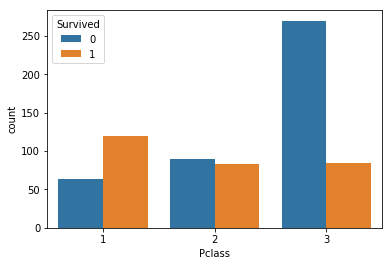

In [40]:
sns.countplot(x='Pclass', hue='Survived', data=train_df);

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

In [65]:
def is_young(x):
    if x < 30 :
        return 'young'
    if x > 60:
        return 'old'

In [66]:
train_df["is_young"] = train_df['Age'].apply(is_young)

In [67]:
train_df["is_young"]

PassengerId
1      young
2       None
3      young
4       None
5       None
7       None
8      young
9      young
10     young
11     young
12      None
13     young
14      None
15     young
16      None
17     young
19      None
21      None
22      None
23     young
24     young
25     young
26      None
28     young
31      None
34       old
35     young
36      None
38     young
39     young
       ...  
857     None
858     None
859    young
861     None
862    young
863     None
865    young
866     None
867    young
868     None
870    young
871    young
872     None
873     None
874     None
875    young
876    young
877    young
878    young
880     None
881    young
882     None
883    young
884    young
885    young
886     None
887    young
888    young
890    young
891     None
Name: is_young, Length: 712, dtype: object

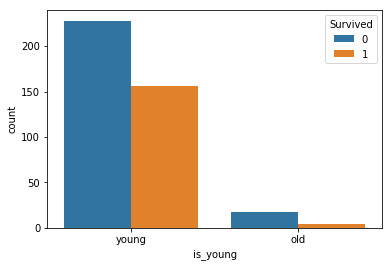

In [70]:
sns.countplot(x='is_young', hue='Survived', data=train_df);

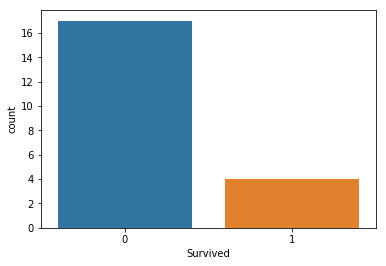

In [60]:
sns.countplottrain_df[train_df['is_young'] == 'old']['Survived']